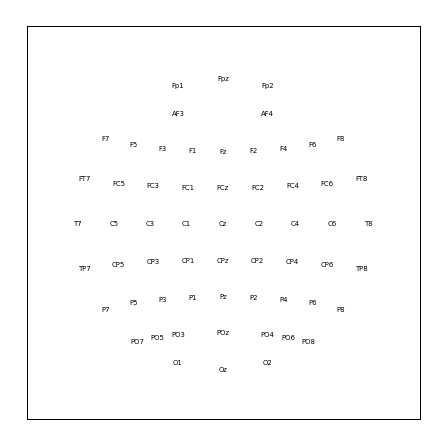

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


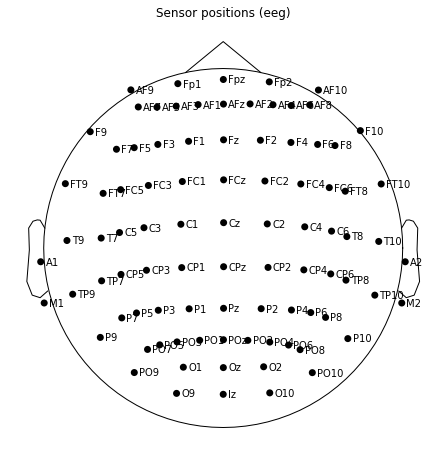

Creating RawArray with float64 data, n_channels=60, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


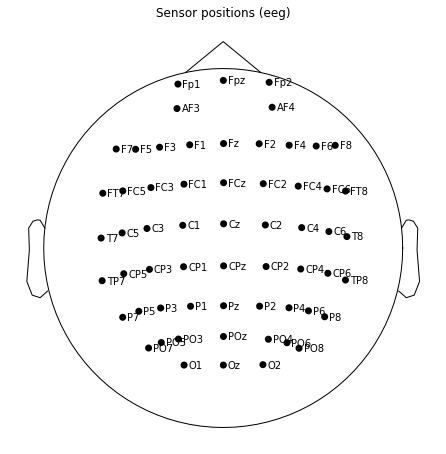

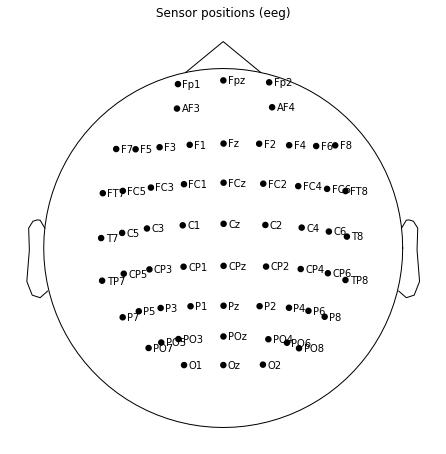

In [92]:
import mne
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib as mpl


#ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
#print(ten_twenty_montage)

#fig = ten_twenty_montage.plot(kind='3d')
#fig.gca().view_init(azim=70, elev=15)
#ten_twenty_montage.plot(kind='topomap', show_names=True)

#biosemi_montage = mne.channels.make_standard_montage('biosemi64')
#biosemi_montage.plot(show_names=True)

#biosemi_montage.plot(sphere=(0, 0, 0.035, 0.094))


import mne

layout = mne.channels.read_layout("EEG1005")
selection = [
    "Fp1",
    "Fpz",
    "Fp2",
    "AF3",
    "AF4",
    "F7",
    "F5",
    "F3",
    "F1",
    "Fz",
    "F2",       
    "F4",
    "F6",
    "F8",
    "FT7",
    "FC5",
    "FC3",
    "FC1",
    "FCz",
    "FC2",
    "FC4",
    "FC6",
    "FT8",
    "T7",
    "C5",
    "C3",
    "C1",
    "Cz",
    "C2",
    "C4",
    "C6",       
    "T8",
    "TP7",
    "CP5",   
    "CP3",
    "CP1",
    "CPz",
    "CP2" ,"CP4","CP6","TP8","P7","P5","P3","P1","Pz","P2","P4","P6","P8","PO7" ,"PO5","PO3","POz","PO4","PO6","PO8","O1","Oz","O2"   
]
picks = []
for channel in selection:
    picks.append(layout.names.index(channel))
display = layout.plot(picks=picks)

# Form the 10-20 montage
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Choose what channels you want to keep 
# Make sure that these channels exist e.g. T1 does not exist in the standard 10-20 EEG system!
kept_channels = ['Fp1','Fpz','Fp2','AF3','AF4','F7','F5','F3','F1','Fz','F2','F4','F6'
            ,'F8','FT7','FC5','FC3','FC1','FCz','FC2','FC4','FC6','FT8','T7','C5'
            ,'C3','C1','Cz','C2','C4','C6','T8','TP7','CP5','CP3','CP1','CPz','CP2'
            ,'CP4','CP6','TP8','P7','P5','P3','P1','Pz','P2','P4','P6','P8','PO7'
            ,'PO5','PO3','POz','PO4','PO6','PO8','CB1','O1','Oz','O2','CB2']
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_new = mont1020.copy()
# Keep only the desired channels
mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Keep the first three rows as they are the fiducial points information
mont1020_new.dig = mont1020.dig[0:3]+kept_channel_info
mont1020.plot()
mont1020_new.plot(sphere=(0, 0, 0.01, 0.0996))